In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from HkVp_multilayer.hkvp_stacking import HkVp_stacking



maindir = "seismic_data_RFAC"
stationname = "ZQ_174"

datadir = f"{maindir}/{stationname}"
delta = 0.01  # Time step in seconds
sed_depth_min = 3
sed_depth_max = 6
sed_k_min = 1.8
sed_k_max = 3.5
priorparam = {
    "Nlayer":2,
    "Vps":[3.5, 6.27],
    "Hs":[100, sed_depth_min, sed_depth_max, 22, 32],
    "Ks":[100, sed_k_min, sed_k_max, 1.5, 2.0]
}


phaseparam = [
    {
        "Pbs":      [1, 0, 1,  -1], 
        "PpPbs":    [1, 0, 1,   1], 
        "PpSbs":    [-1, 0, 2,  0], 
        "PsSbs":    [-1, 0, 3, -1],
        "PbP":      [-1, 2, 0,  2], 
        "SbS":      [-1, 4, 2,  0]  
    },
    {
        "Pms":      [1, 1,  1, -1,  1, -1,],  
        # "PpPms-PbP":[1, 1,  1, -1,  1,  1,],  
        "PpPms":    [1, 1,  1,  1,  1,  1,],  
        "PmP":      [-1,3,  0,  2,  0,  2,],  
        # "PmP+PbP":  [1, 3,  0,  4,  0,  2,],  
        "bPmSb":    [1, 5,  0,  0,  1,  1,],  
#        "PpPms":    [1, 5,  1,  1,  1,  1,],  
    }
]

datanpz = np.load(f"{datadir}/data_stack52.npz") ##7 5, 0.08
data_stack = datanpz['data_stack']
ray_params = datanpz['ray_params']
traces_suppress = [1,1,3,3,5,5]  ## the trace number where the phases trace should be suppressed; The traces should have the same data source with their index trace
alphas = [5,2,5,2,5,2]    ## 
HkVp_instance = HkVp_stacking(delta,
                            data_stack,
                            alphas,
                            traces_suppress,
                            ray_params,
                            priorparam,
                            phaseparam,
                            2
                            )
HkVp_instance.do_Hk_stacking()
# amp_vpc=HkVp_instance.do_Vpc_searching(6.,7.,10)
HkVp_instance.do_hk_bootstrap(1000,16)
HkVp_instance.save_result_to_npz(savedir=datadir,savename='Hk_result_52_pws2')
del HkVp_instance


Process 157162 working (Job Number : 62)
Process 157163 working (Job Number : 62)
Process 157164 working (Job Number : 62)
Process 157165 working (Job Number : 62)
Process 157166 working (Job Number : 62)
Process 157167 working (Job Number : 62)
Process 157168 working (Job Number : 62)
Process 157169 working (Job Number : 62)
Process 157170 working (Job Number : 62)
Process 157171 working (Job Number : 62)
Process 157172 working (Job Number : 62)
Process 157173 working (Job Number : 62)
Process 157174 working (Job Number : 62)
Process 157175 working (Job Number : 62)
Process 157176 working (Job Number : 62)
Process 157177 working (Job Number : 62)
Process 157162 finished
Process 157165 finished
Process 157166 finished
Process 157163 finished
Process 157164 finished
Process 157167 finished
Process 157171 finished
Process 157170 finished
Process 157173 finished
Process 157168 finished
Process 157174 finished
Process 157175 finished
Process 157176 finished
Process 157169 finished
Process 

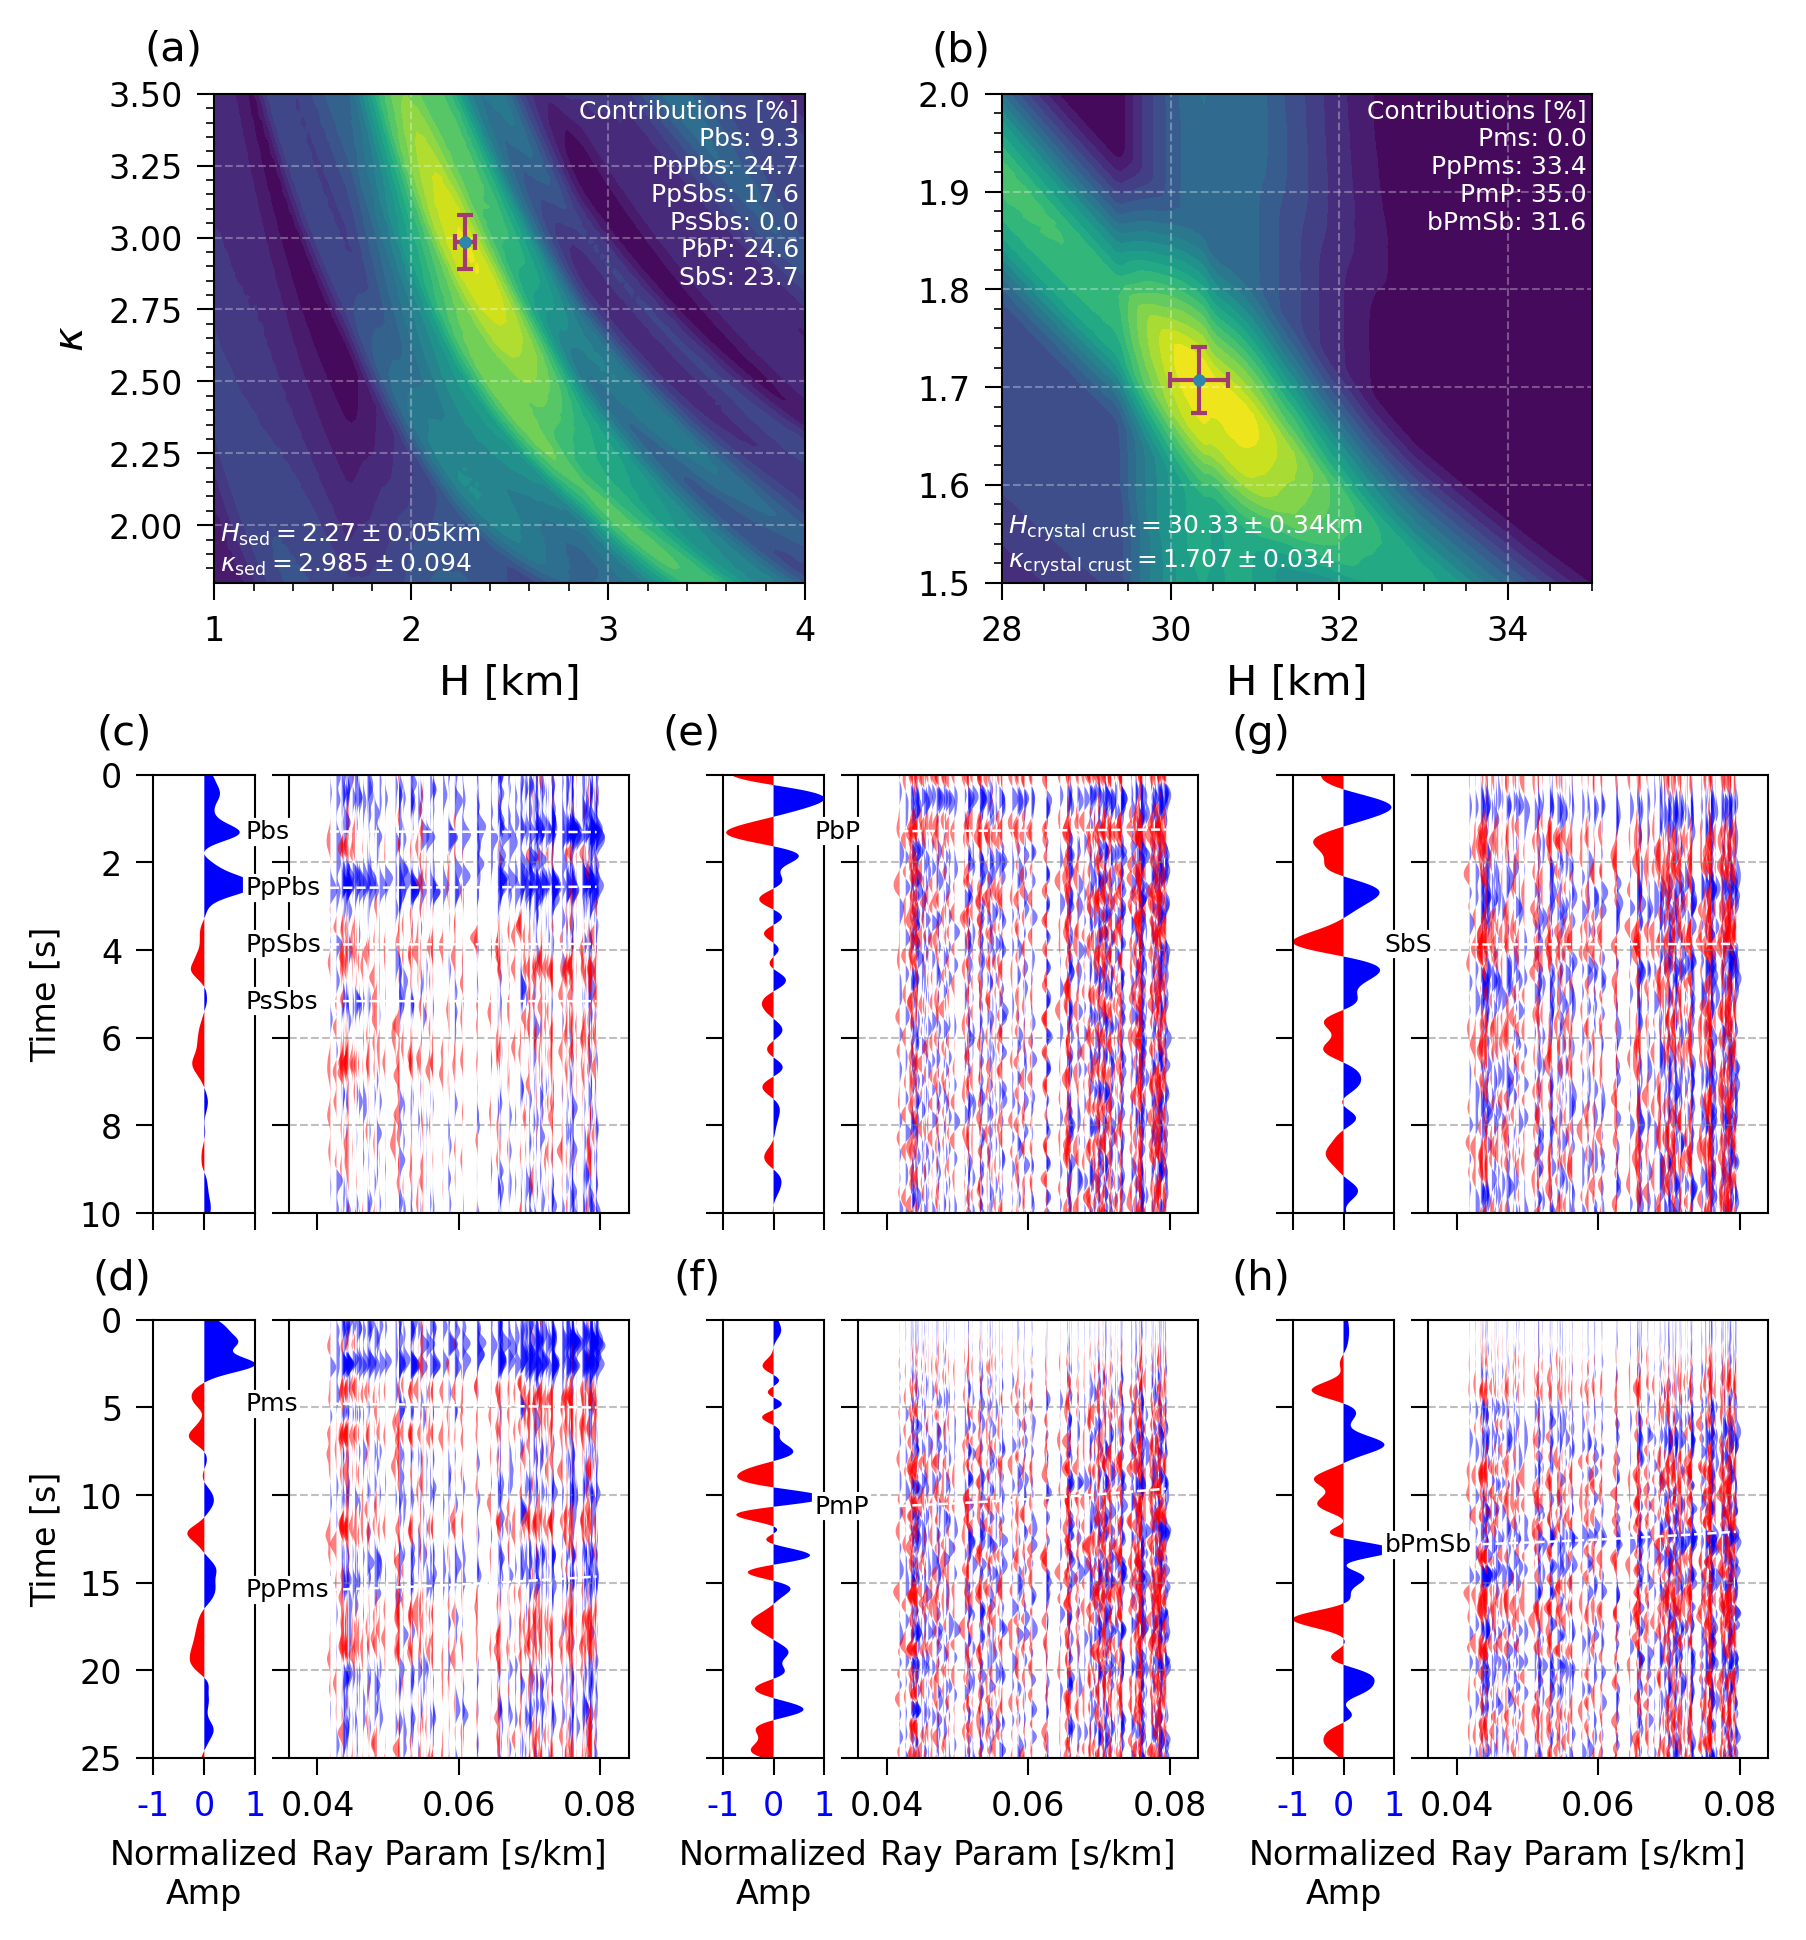

In [2]:
from HkVp_multilayer.plotting import Plot_HkVp
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams['figure.dpi'] = 300


maindir = "seismic_data_RFAC"
stationname = "ZQ_161"
datadir = f"{maindir}/{stationname}"
save_filename = f"Hk_result_52_pws2_Hk_result.npz"
plot_instance = Plot_HkVp(savefile=f"{datadir}/{save_filename}")
plot_instance.data_Hk_Phasefitting(savefile=f"{datadir}/Hk_phasefitting.pdf",dpi=900,plotlengths = [10,25,10,25,10,25])
#plot_instance.plot_HkVp(savefile=f"{resultdir}/HkVp.pdf",dpi=900)